# CASO PRACTICO-BDD FINAL
### Integrantes: 
              Stephanie Salomé Mejía Vera
              Alejandro Andrés Cuzco Peñafiel
              Edwin Rodrigo Luna Vizhñay



Obtenga las correlaciones entre los datos de corte numérico. 

Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

Indique que tipo de modelación realizarán y porqué. 

Verifique los supuestos, de haber escogido el enfoque econométrico. 
Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.
Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 
 Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 
Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 

# 1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [1]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from statsmodels.compat import lzip

# reset rc params to defaults
sns.reset_orig()

# Importamos un archivo csv a un DataFrame en pandas
data = pd.read_csv("Walmart.csv")

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique ¿hay algo que le llame la atención? 

In [2]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Respuesta:
Se identifican 8 variables, de las cuales 2 es variables son categoricas que es Holiday_flag y Store.

# 3. Evalúe si la base contiene datos perdidos. 

In [4]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Respuesta: 
No existe datos perdidos.


## 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir 
## 5 Grafique las distribuciones de las variables y a priori comente sobre ellas.

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

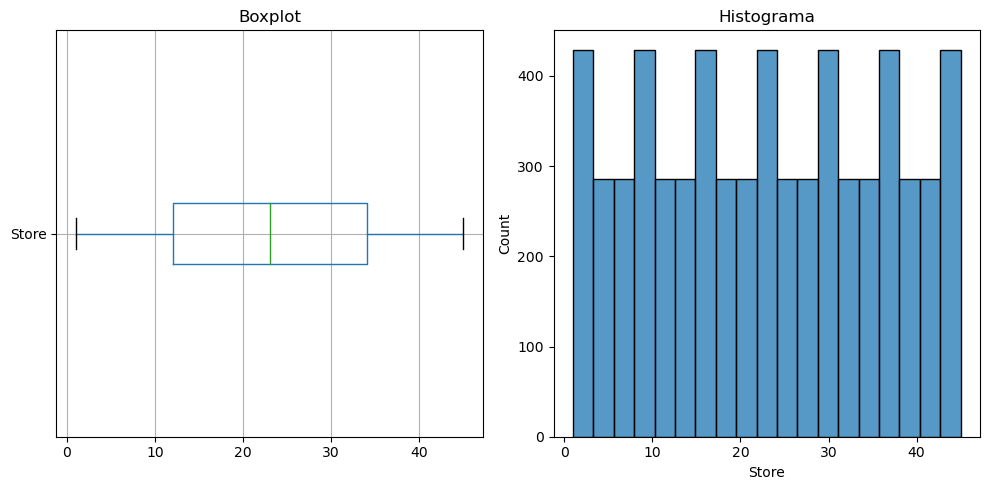

In [6]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Store", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.histplot(data["Store"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta: 
Se puede observar que la mayoria de tiendas tienen frecuencias semejantes. ciertas tiendas pueden tener un valor mayor de datos comparado con el resto.


C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\1171582828.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekly_Sales"], ax=axes[1])


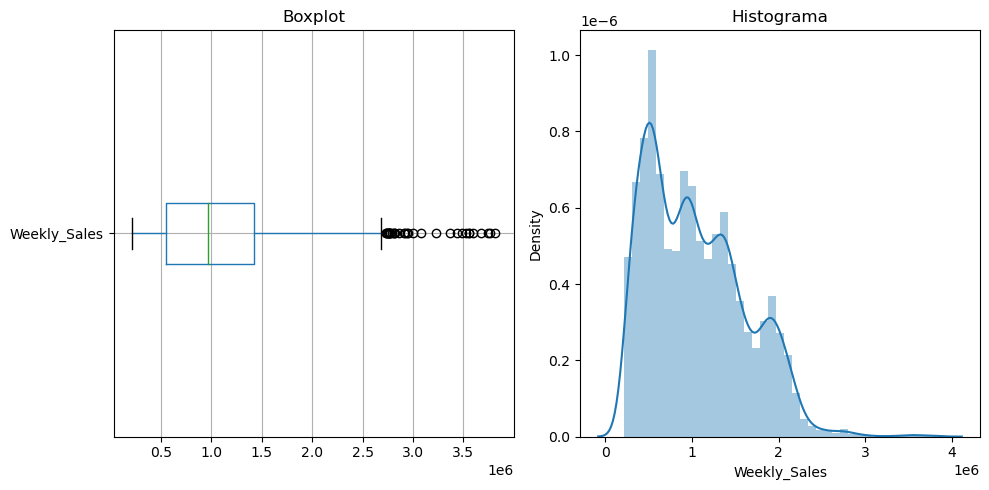

In [7]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Weekly_Sales", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Weekly_Sales"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
Existe una distribución sesgada a la derecha, por lo que se procede a calcular el logaritmo de la variable. 

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\1421176615.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Holiday_Flag"], ax=axes[1])


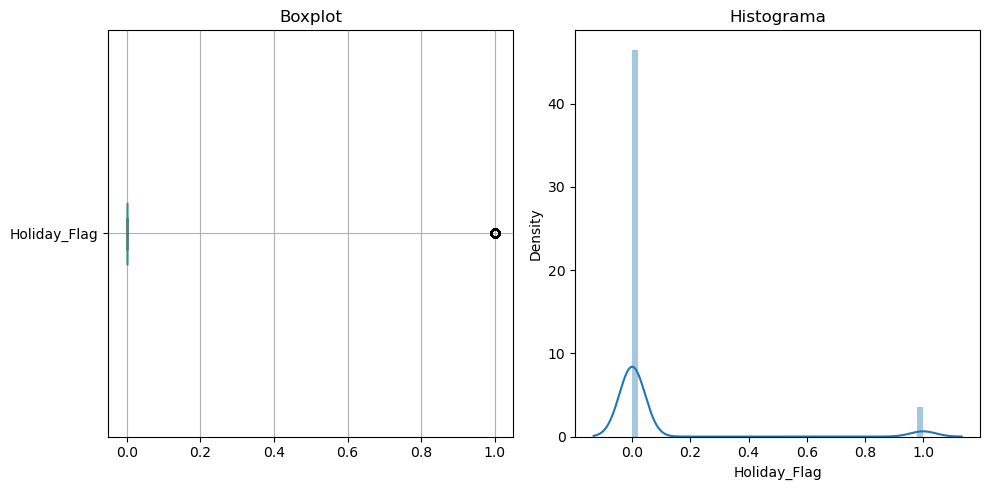

In [8]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Holiday_Flag", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Holiday_Flag"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
En este caso los datos con mayor freciencia son 0 que representa el hecho que las compras se hacen normalmente en días no festivos. Walmart vende productos de primera necesidad, y en el año los dias no festivos son los que predominan. 

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\3950576138.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Temperature"], ax=axes[1])


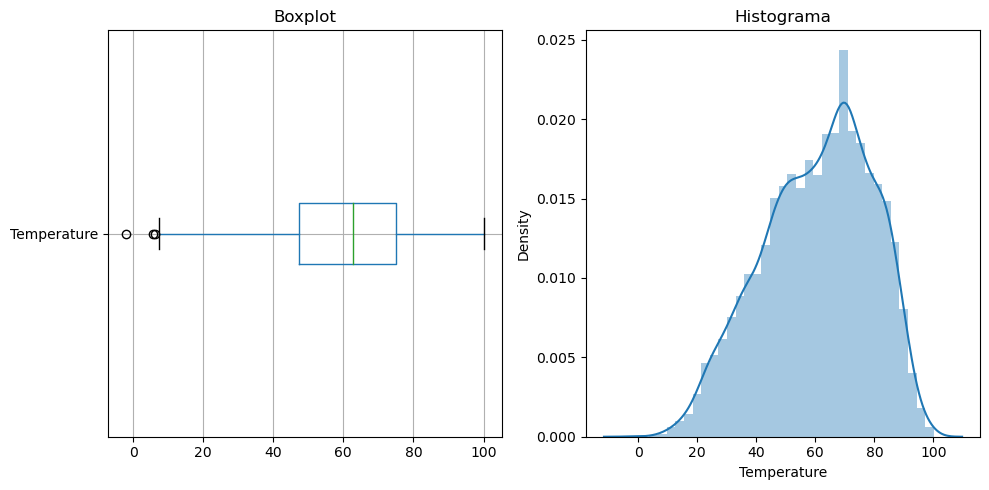

In [9]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Temperature", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Temperature"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
La variable temperatura en sun distribución tiene un ligero sesgo hacia la derecha y se observa que mientras mas alto es la temperatura los clientes tienen mayor afinidad por las compras, además se puede observar unos datos atípicos, la temperatura de -206 grados no existe, por lo que los valores deben ser eliminados. 

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\4290663001.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Fuel_Price"], ax=axes[1])


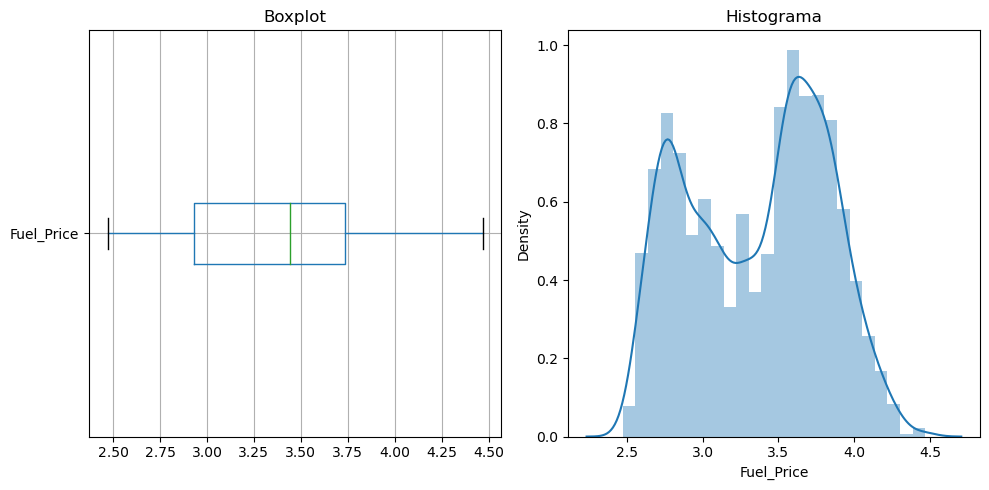

In [10]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Fuel_Price", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Fuel_Price"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
Esta variable tiene una distribución bimodal, lo que indica que hay dos valores predominantes, cuando el combustible esta en un valor bajo de alrededor de 2.7 y alto de 3.7

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\1140612218.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CPI"], ax=axes[1])


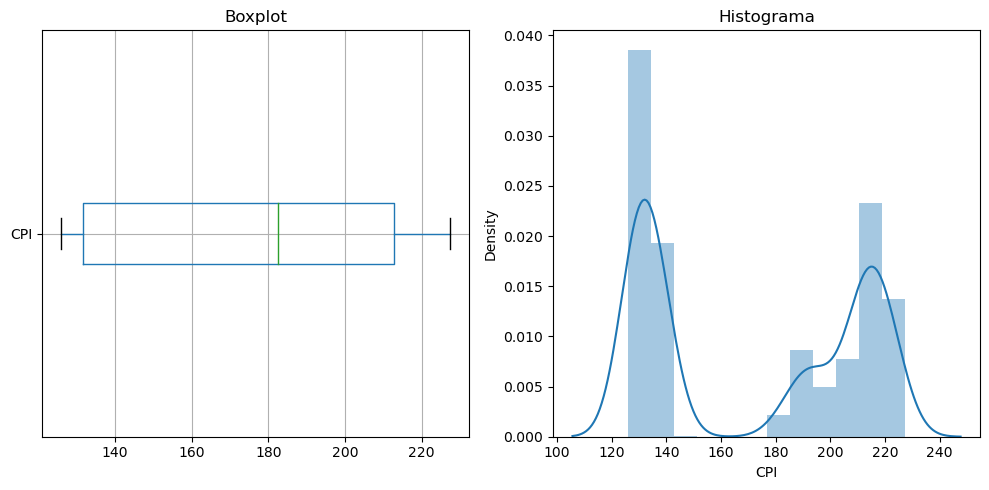

In [11]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="CPI", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["CPI"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
Se puede observar que en esta variable existe dos picos predominantes, alrededor de 130 y otro alreder de 210.

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\3991275191.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Unemployment"], ax=axes[1])


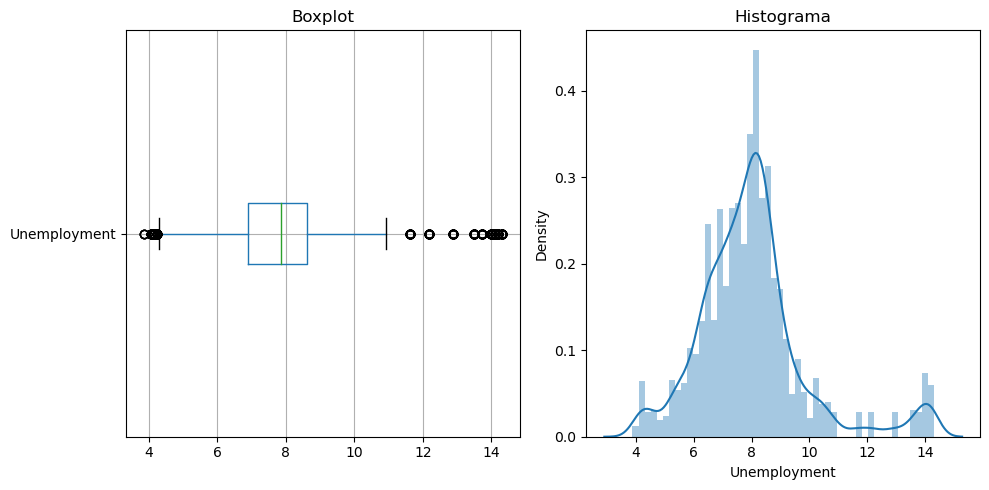

In [12]:
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Unemployment", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Unemployment"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
En esta variable se puede observar datos atipicos, pero la mayor densidad de datos bordea en número 8. 

### De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 

C:\Users\edwin luna\AppData\Local\Temp\ipykernel_16508\1544187089.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Temperature"], ax=axes[1])


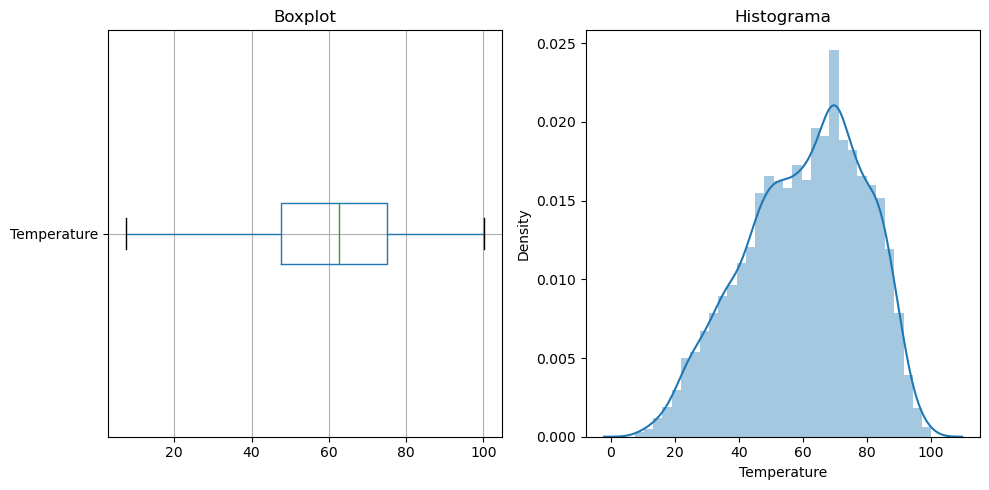

In [13]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = data.Temperature.quantile(0.25)
Q3 = data.Temperature.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
data = data[~((data["Temperature"] < (Q1 - 1.5 * IQR)) |(data["Temperature"] > (Q3 + 1.5 * IQR)))]
data.shape
# Creamos una figura y ejes para las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot en el primer eje
data.boxplot(column="Temperature", ax=axes[0], vert=False)
axes[0].set_title('Boxplot')

# Histograma en el segundo eje
sns.distplot(data["Temperature"], ax=axes[1])
axes[1].set_title('Histograma')

# Ajustes de diseño
plt.tight_layout()

# Mostrar las gráficas
plt.show()

### Respuesta:
Se selecciono el método estadistico correctivo de eliminación para la variable Temperature, ya que los valores no eran consistentes. 

In [ ]:
### data['Weekly_Sales'] = np.log(data['Weekly_Sales'])

## 6. Obtenga las correlaciones entre los datos de corte numérico. 

In [14]:
data.corr().style.background_gradient(cmap='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335549,-0.000062,-0.023472,0.059830,-0.209509,0.223614
Weekly_Sales,-0.335549,1.000000,0.036843,-0.064579,0.009358,-0.072635,-0.106127
Holiday_Flag,-0.000062,0.036843,1.000000,-0.155847,-0.078445,-0.002230,0.010952
Temperature,-0.023472,-0.064579,-0.155847,1.000000,0.144344,0.176623,0.101323
Fuel_Price,0.059830,0.009358,-0.078445,0.144344,1.000000,-0.170854,-0.034736
CPI,-0.209509,-0.072635,-0.002230,0.176623,-0.170854,1.000000,-0.302240
Unemployment,0.223614,-0.106127,0.010952,0.101323,-0.034736,-0.302240,1.000000


### Respuesta:
Este conjunto de datos parece indicar una correlación entre las ventas semanales y varios factores externos. Los coeficientes representan la magnitud y orientación de la correlación entre las ventas semanales y cada variable.

Precio de la gasolina (0.009358): - El coeficiente positivo indica una pequeña asociación positiva con las ventas semanales, lo que sugiere que los precios más altos de la gasolina pueden tener un efecto beneficioso limitado sobre las ventas.

Temperatura (0.144344): - El coeficiente positivo indica una asociación positiva entre la temperatura y las ventas semanales. Esto significa que cuando las temperaturas sube, es probable que también suban las ventas semanales.

El Índice de Precios al Consumidor (IPC) tiene una correlación negativa de -0.072635 con las ventas semanales, lo que indica que un aumento en el IPC probablemente resulte en una caída de las ventas semanales.

Desempleo (-0.106127): - Esta es la correlación negativa más pronunciada en el conjunto de datos, lo que sugiere que las tasas de desempleo más altas están vinculadas a una caída más sustancial en las ventas semanales.

En resumen, la evidencia indica  que un índice de precios al consumidor más alto y el aumento del desempleo tienen una influencia negativa en las ventas semanales. Mientras tanto, existe una ligera asociación positiva entre las temperaturas, los precios y las ventas de combustible. Estas observaciones pueden ser beneficiosas para comprender y pronosticar los aspectos que impactan el desempeño de las ventas.

Se escoge a la variable Weekly_sales ya que el modelo intenta describir como se comportan las ventas respecto a los otros parámetros.



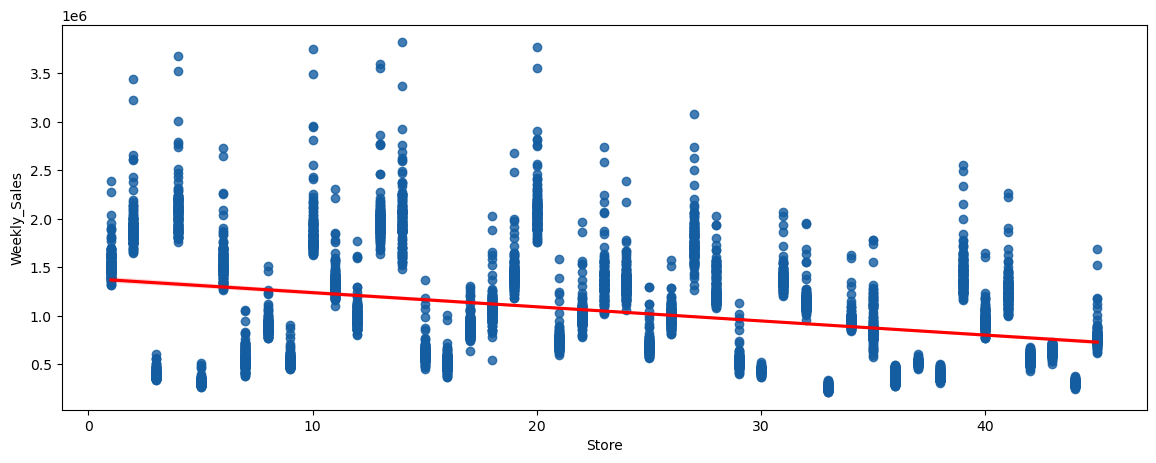

In [15]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Store', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

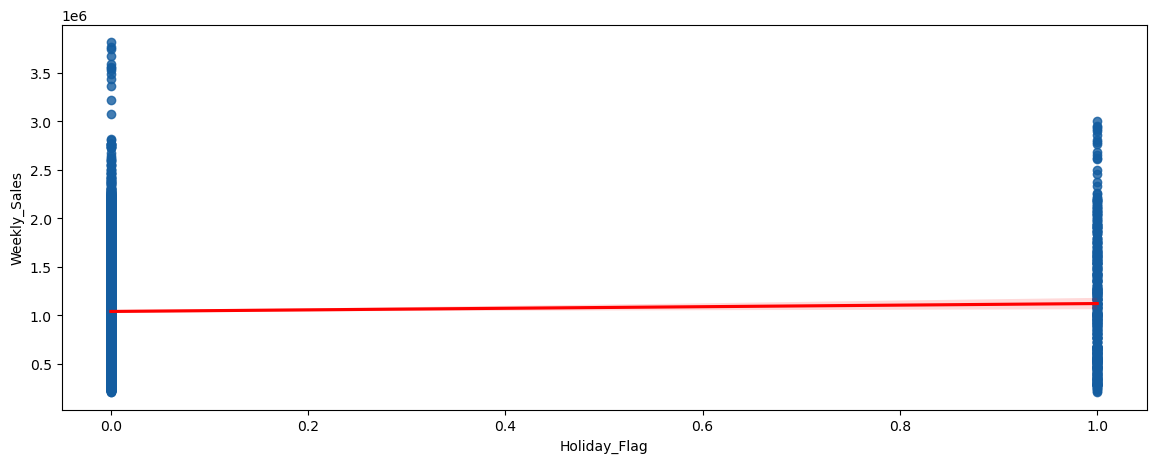

In [16]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Holiday_Flag', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

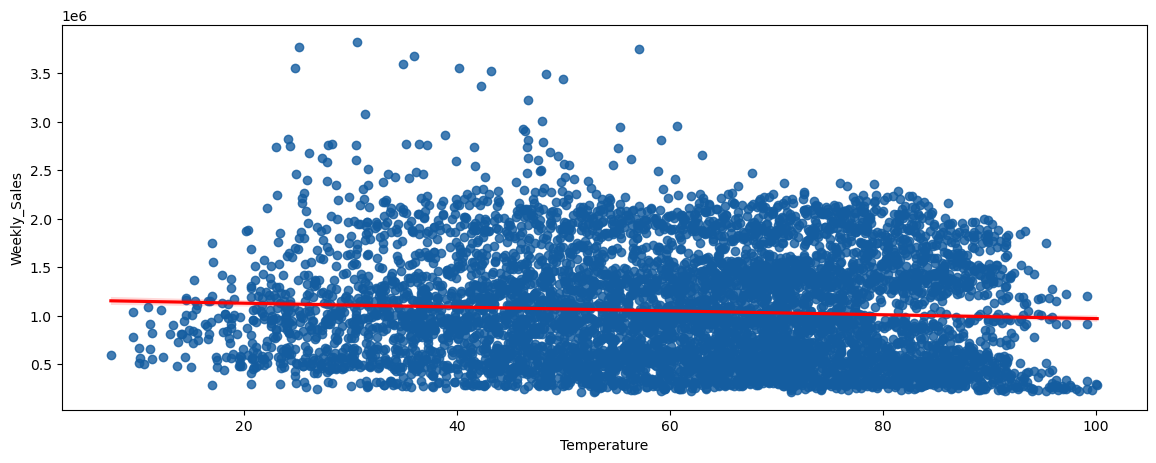

In [17]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Temperature', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

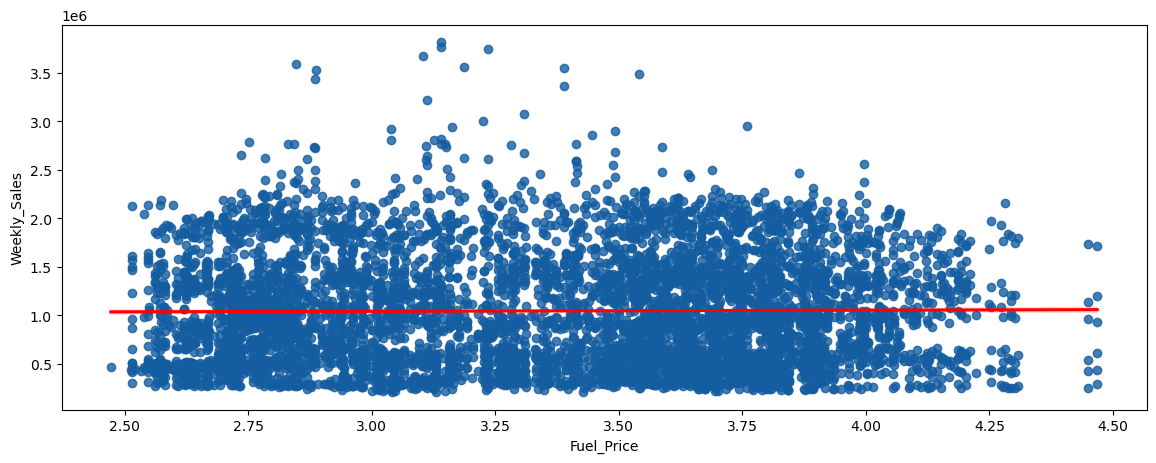

In [18]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Fuel_Price', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

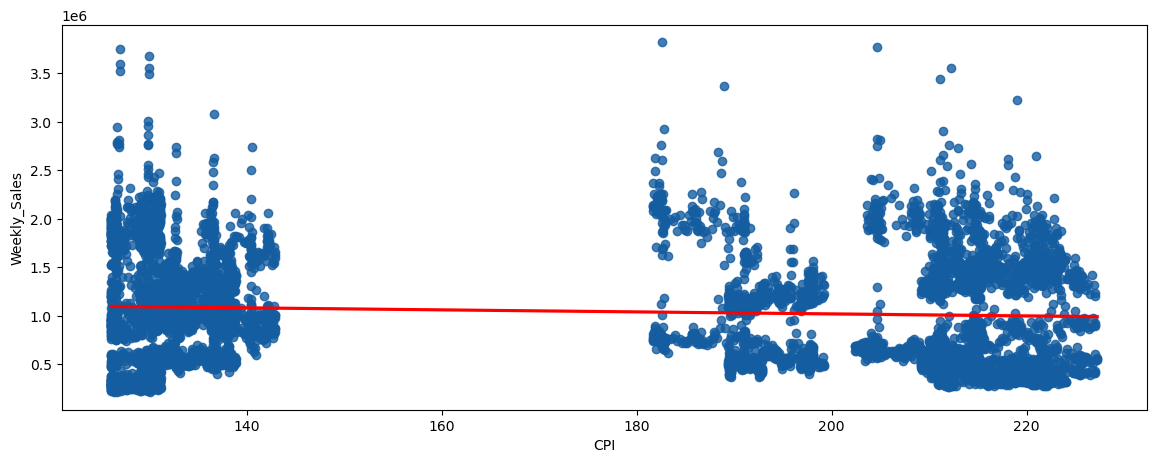

In [19]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'CPI', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

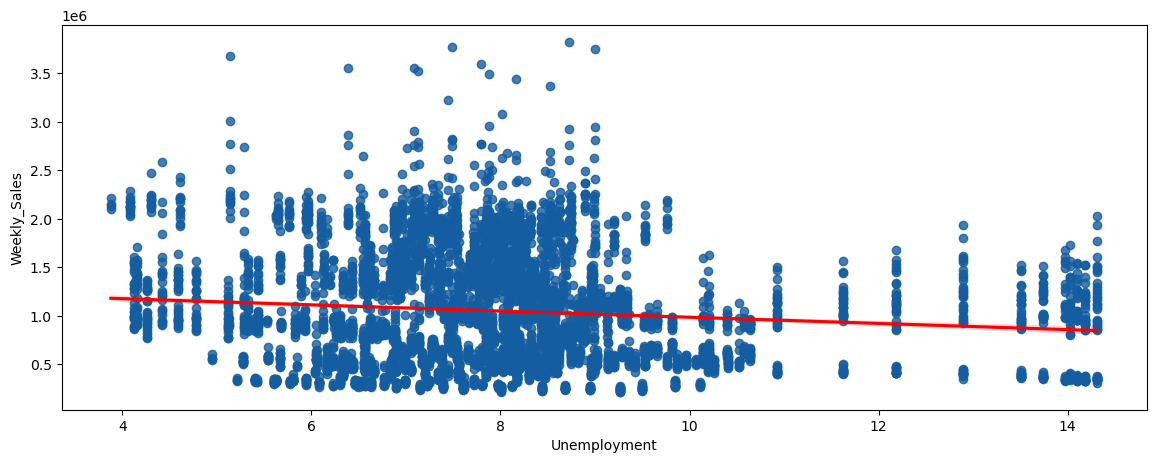

In [20]:
plt.figure(figsize = (14, 5))
sns.regplot(data = data, x = 'Unemployment', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

## 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

### Respuesta:
Se escoge a la variable Weekly_sales ya que el modelo intenta describir como se comportan las ventas respecto a los otros parámetros.

## 8. Indique que tipo de modelación realizarán y porqué.

In [21]:
data.rename({'Weekly_Sales':'WeeklySales', "Holiday_Flag":'HolidayFlag', 'Fuel_Price': 'FuelPrice'}, axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6432 non-null   int64         
 1   Date          6432 non-null   datetime64[ns]
 2   WeeklySales   6432 non-null   float64       
 3   HolidayFlag   6432 non-null   int64         
 4   Temperature   6432 non-null   float64       
 5   FuelPrice     6432 non-null   float64       
 6   CPI           6432 non-null   float64       
 7   Unemployment  6432 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.2 KB


In [23]:
regresion = ols("WeeklySales ~ Store + HolidayFlag + Temperature + FuelPrice + CPI + Unemployment",data=data )
results_1=regresion.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:            WeeklySales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          5.35e-209
Time:                        21:33:47   Log-Likelihood:                -93817.
No. Observations:                6432   AIC:                         1.876e+05
Df Residuals:                    6425   BIC:                         1.877e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.998e+06   7.55e+04     26.472   

### Podemos observar que la unica variable con un  P>|t| es el FuelPrice por eso se lo eliminara del análisis.

In [26]:
regresion2 = ols("WeeklySales ~ Store + HolidayFlag + Temperature + CPI + Unemployment",data=data )
results_2=regresion2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:            WeeklySales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     212.2
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          4.30e-210
Time:                        21:37:32   Log-Likelihood:                -93818.
No. Observations:                6432   AIC:                         1.876e+05
Df Residuals:                    6426   BIC:                         1.877e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.034e+06   5.07e+04     40.121   

In [27]:
data['Store'] = data['Store'].astype('object')
data['HolidayFlag'] = data['HolidayFlag'].astype('object')


In [28]:
data.drop(['Date','FuelPrice'], axis = 1, inplace = True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6432 non-null   object 
 1   WeeklySales   6432 non-null   float64
 2   HolidayFlag   6432 non-null   object 
 3   Temperature   6432 non-null   float64
 4   CPI           6432 non-null   float64
 5   Unemployment  6432 non-null   float64
dtypes: float64(4), object(2)
memory usage: 351.8+ KB


## Indique que tipo de modelación realizarán y porqué. 

### Respuesta: 
Se escoge un modelo de regresión lineal con la variable ventas semanales, y las variables incluidas Store, HolidayFlag, Temperature, CPI  y  Unemployment

## 9. Verifique los supuestos, de haber escogido el enfoque econométrico. 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
var_cuantitativas = data.select_dtypes('number').columns
var_cualitativas  =data.select_dtypes('object').columns

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [34]:
data[var_cualitativas] = data[var_cualitativas].apply(labelencoder.fit_transform)

In [35]:
X = data[data.columns.difference(['WeeklySales'])]
y = data.WeeklySales

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [38]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5145, 5)  <class 'pandas.core.frame.DataFrame'>
(5145,) 	  <class 'pandas.core.series.Series'>
(1287, 5)  <class 'pandas.core.frame.DataFrame'>
(1287,) 	  <class 'pandas.core.series.Series'>


In [39]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [40]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

275047039717.78876
267029139021.37814


In [43]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

524449.2727783964
516748.6226603591


In [44]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

429890.1612584356
432343.8303743311


In [45]:
from sklearn.metrics import r2_score

In [46]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.1425738429764405
El R^2 del subconjunto de prueba es: 0.13741656661964652


## 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

### Respuesta:
Este modelo de regresión lineal ordinaria (OLS) tiene un R-cuadrado de aproximadamente 0.142, lo que significa que alrededor del 14.2% de la variabilidad en las ventas semanales se explica por las variables incluidas en el modelo. El valor p asociado con el F-statistic es muy pequeño, lo que indica que al menos una de las variables independientes es significativa para predecir las ventas semanales. Los coeficientes de regresión proporcionan información sobre la magnitud y dirección de la relación entre cada variable independiente y las ventas semanales. Sin embargo, es importante considerar la significancia individual de cada variable junto con la normalidad de los residuos y otros diagnósticos para una evaluación completa del modelo.

## 11. Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

In [47]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 2025375.312354684
pendiente: [ -2370.30372866  80532.05038273 -15522.45320127  -1061.81758766
 -21089.80256475]


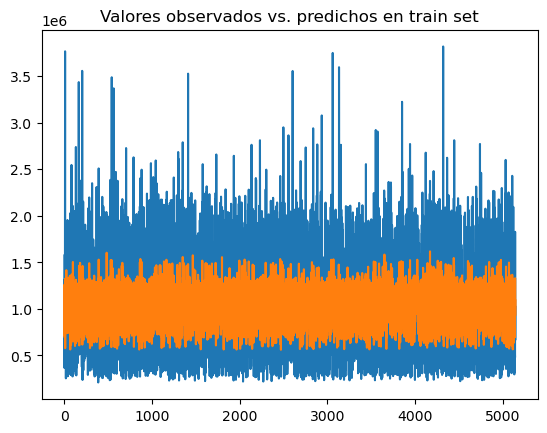

In [48]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

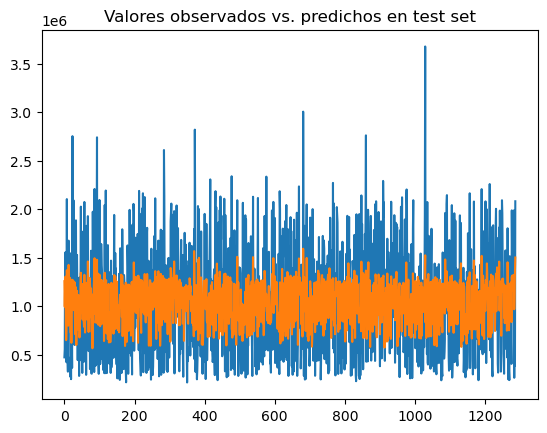

In [49]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [53]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [54]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [55]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.1425738429764405
El R^2 del subconjunto de prueba es: 0.13741656661964652


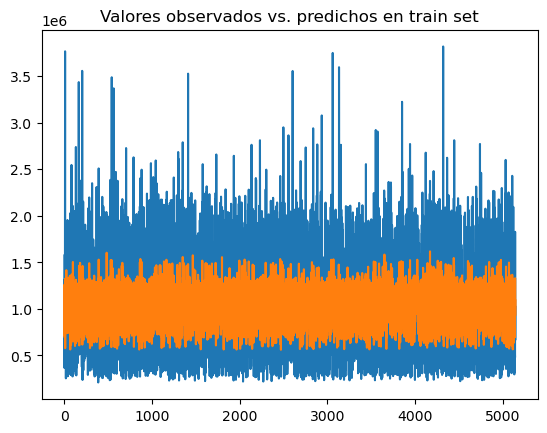

In [56]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

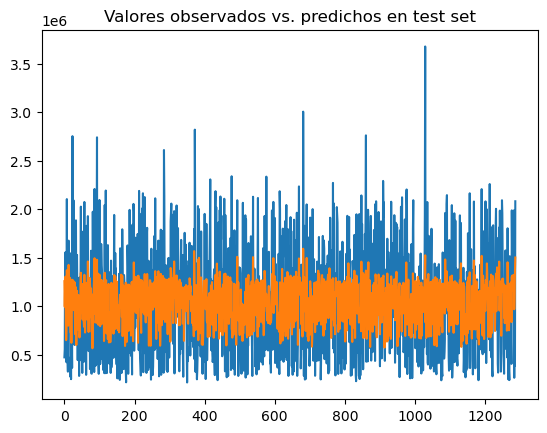

In [57]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [58]:
importancia = modelo_regresion_std.coef_

In [59]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -93134.85131
Variable explicativa No. 1, Score: 20569.91817
Variable explicativa No. 2, Score: -201129.25806
Variable explicativa No. 3, Score: -19565.06802
Variable explicativa No. 4, Score: -39249.94735


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6432 non-null   int32  
 1   WeeklySales   6432 non-null   float64
 2   HolidayFlag   6432 non-null   int32  
 3   Temperature   6432 non-null   float64
 4   CPI           6432 non-null   float64
 5   Unemployment  6432 non-null   float64
dtypes: float64(4), int32(2)
memory usage: 301.5 KB


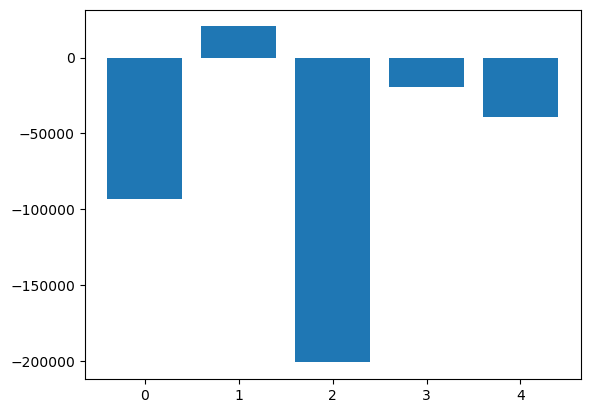

In [61]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

 ## Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

### Respuesta: 
Por enfoque econométrico el  modelo de regresión lineal ordinaria (OLS) tiene un R-cuadrado de aproximadamente 0.142, lo que significa que alrededor del 14.2% de la variabilidad en las ventas semanales se explica por las variables incluidas en el modelo. El valor p asociado con el F-statistic es muy pequeño, lo que indica que al menos una de las variables independientes es significativa para predecir las ventas semanales. Los coeficientes de regresión proporcionan información sobre la magnitud y dirección de la relación entre cada variable independiente y las ventas semanales. Sin embargo, es importante considerar la significancia individual de cada variable junto con la normalidad de los residuos y otros diagnósticos para una evaluación completa del modelo.

Por ML las resultados indican que en general:
Un coeficiente negativo indica una relación negativa entre la variable explicativa y la variable de respuesta. Esto significa que, en promedio, un aumento en el valor de la variable explicativa está asociado con una disminución en el valor de la variable de respuesta. Un coeficiente positivo indica una relación positiva entre la variable explicativa y la variable de respuesta. Esto significa que, en promedio, un aumento en el valor de la variable explicativa está asociado con un aumento en el valor de la variable de respuesta, la variable explicativa con más altop valor es la 2 (HolidayFlag).